# Exercise - CIFAR-10 classification

The goal of this exercise is to test a network architecture on the CIFAR-10 data set. The CIFAR-10 data set contains 32 by 32 RGB images. Hence, we will have to adapt the shape of some of the tensors.

### Instructions

The data set is a bit larger than usual (17MB). Hence, two separate archives are provided. One with the exercise notebook and one with the data set.

In [53]:
import numpy as np

# Load data
with np.load('Course 4\cifar10-6k.npz', allow_pickle=False) as npz_file:
    # Load items into a dictionary
    cifar = dict(npz_file.items())
    
cifar

{'data': array([[ 59,  62,  63, ..., 123,  92,  72],
        [154, 177, 187, ..., 143, 133, 144],
        [255, 255, 255, ...,  80,  86,  84],
        ...,
        [250, 253, 254, ..., 240, 233, 229],
        [136, 167, 138, ...,  31,  82,  35],
        [170, 182, 189, ...,  92, 109, 118]], dtype=uint8),
 'labels': array([6, 9, 9, ..., 9, 4, 8]),
 'names': array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
        'horse', 'ship', 'truck'], dtype='<U10')}

In [54]:
from sklearn.model_selection import train_test_split

# Create train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    # convert uint8 pixel values to float
    cifar['data'].astype(np.float32),
    cifar['labels'],
    test_size=1000,
    random_state=0)

# Split again into validation/test sets
X_valid, X_test, y_valid, y_test = train_test_split(
    X_test,
    y_test,
    test_size=0.5,
    random_state=0)

print('Train:', X_train.shape, y_train.shape)
print('Validation', X_valid.shape, y_valid.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (5000, 3072) (5000,)
Validation (500, 3072) (500,)
Test: (500, 3072) (500,)


In [55]:
import tensorflow as tf

# Create placeholders
X = tf.placeholder(dtype=tf.float32, shape=[None, 3072]) # 32*32*3 (couleurs RGB)
y = tf.placeholder(dtype=tf.int32, shape=[None])

In [56]:
# Create variables
W = tf.Variable(initial_value=tf.zeros(shape=[3072, 10]))
b = tf.Variable(initial_value=tf.zeros(shape=[10]))

In [57]:
# Compute logits
logits = tf.add(tf.matmul(X, W), b) # multiplying matrices + adding bias (b)
print(logits.shape)

(?, 10)


In [58]:
# Cross-entropy loss function (without one-hot encoding)
ce = tf.nn.sparse_softmax_cross_entropy_with_logits(
    labels=y, logits=logits)

In [59]:
# Mean cross-entropy
mean_ce = tf.reduce_mean(ce)
print(mean_ce.shape)

()


In [60]:
# Gradient descent
lr = tf.placeholder(dtype=tf.float32, shape=[])
gd = tf.train.GradientDescentOptimizer(
    learning_rate=lr)

# Minimize cross-entropy
train_op = gd.minimize(mean_ce)

In [61]:
# Compute predictions
predictions = tf.argmax(
    logits, # shape: (n,10)
    axis=1, # class with max logit
    output_type=tf.int32 # Same type as labels
)
print(predictions.shape)

(?,)


In [62]:
# Are the predictions correct?
is_correct = tf.equal(y, predictions)
print(is_correct.shape)

(?,)


In [63]:
# Accuracy
accuracy = tf.reduce_mean(
    # Convert booleans (false/true) to 0/1 float numbers
    tf.cast(is_correct, dtype=tf.float32)
)
print(accuracy.shape)

()


In [64]:
# Function to het batches of data
def get_batches(X, y, batch_size):
    # Enumerate indexes by steps of batch_size
    # i: 0, b, 2b, 3b, 4b, ... where b is batch size
    for i in range(0, len(y), batch_size):
        # "yield" data between index i and i+b (not included)
        yield X[i:i+batch_size], y[i:i+batch_size]
        
get_batches(X_train, y_train, 64)

<generator object get_batches at 0x0000017EA65D0150>

In [65]:
# Use generator in a "for" loop
for X_batch, y_batch in get_batches(X_train, y_train, 64):
    print('Batch X/y:', X_batch.shape, y_batch.shape)

Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072) (64,)
Batch X/y: (64, 3072

In [66]:
# Accuracy score after ech batch of data
acc_values = []

# Initialization operation
initialization_op = tf.global_variables_initializer()

with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)
    
    # Get batches of data
    for X_batch, y_batch in get_batches(X_train, y_train, 64):
        # Run trianing and evaluate accuracy
        _, batch_acc = sess.run([train_op, accuracy], feed_dict={
            X: X_batch,
            y: y_batch,
            lr: 0.001 # learning rate
        })
        acc_values.append(batch_acc)
        
        # Get weight matrix and biases
        W_fitted = W.eval()
        b_fitted = b.eval()
        # ... which is equivalent to 
        W_fitted, b_fitted = sess.run([W, b])

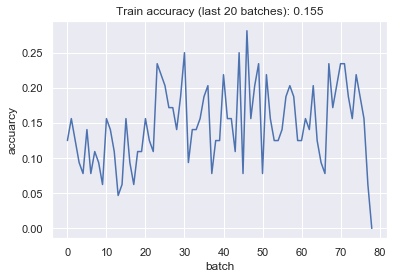

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot accuracy values
plt.plot(acc_values)
plt.title('Train accuracy (last 20 batches): {:.3f}'.format(
    # Average accuracy value
    np.mean(acc_values[-20:])
))
plt.xlabel('batch')
plt.ylabel('accuarcy')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

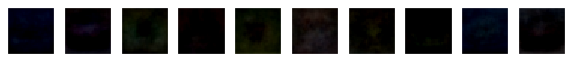

In [68]:
# Visualize templates

# Create figure with 10 subplots
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10,2))

# Plot the weights for each class in a subplot
for i, axis in enumerate(axes):
    # Get weights of the i-th class
    weights = W_fitted[:, i]
    
    # Reshape weight values into a 32x32x3 array
    template = weights.reshape(32,32,3)
    
    # Plot array
    axis.imshow(template, plt.cm.gray_r) # Grayscale (reversed)
    axis.get_xaxis().set_visible(False) # disable x-axis
    axis.get_yaxis().set_visible(False) # disable y-axis

plt.show()

In [69]:
# Improve learning

from sklearn.preprocessing import StandardScaler

# Create StandardScaler object and fit it to trian data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [70]:
# Accuracy scores after each batch
train_acc_values = []
valid_acc_values = []

with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)

    # Rescale input data
    X_train_rescaled = scaler.transform(X_train)
    X_valid_rescaled = scaler.transform(X_valid)

    # Get batches of data
    for X_batch, y_batch in get_batches(X_train_rescaled, y_train, 64):
        # Run training and evaluate accuracy
        _, train_acc = sess.run([train_op, accuracy], feed_dict={
            X: X_batch,
            y: y_batch,
            lr: 0.001 # decrease learning rate
        })
        train_acc_values.append(train_acc)

        # Evaluate validation accuracy
        valid_acc = sess.run(accuracy, feed_dict={
            X: X_valid_rescaled,
            y: y_valid
        })
        valid_acc_values.append(valid_acc)

    # Get weight matrix and biases
    W_fitted = W.eval()
    b_fitted = b.eval()

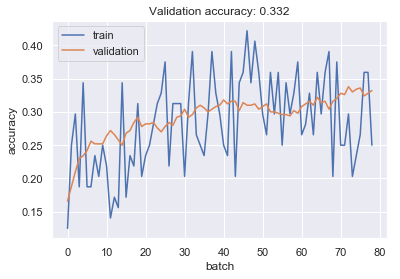

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot accuracy values
plt.plot(train_acc_values, label='train')
plt.plot(valid_acc_values, label='validation')
plt.title('Validation accuracy: {:.3f}'.format(
    valid_acc_values[-1] # Last validation accuracy value
))
plt.xlabel('batch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Plot templates

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


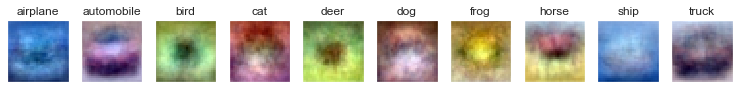

In [72]:
from sklearn.preprocessing import MinMaxScaler
# Visualize templates

# Rescale each column of the weights matrix between 0 and 1
W_fitted_rescaled = MinMaxScaler().fit_transform(W_fitted)

# Create figure with 10 subplots
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(13, 2))

# Plot the weights for each class in a subplot
for i, axis in enumerate(axes):
    # Get weights of the i-th class
    weights = W_fitted_rescaled[:, i]
    
    # Reshape weight values into a 32x32x3 array
    template = weights.reshape(32, 32, 3)
    
    # Plot array
    axis.set_title(cifar['names'][i])
    axis.imshow(template)
    axis.get_xaxis().set_visible(False) # disable x-axis
    axis.get_yaxis().set_visible(False) # disable y-axis
    
plt.show()

### Evaluate model

In [73]:
with tf.Session() as sess:
    # Initialize the graph
    sess.run(initialization_op)

    # Compute test accuracy
    acc_val = sess.run(accuracy, feed_dict={
        X: scaler.transform(X_test), # Rescale data
        y: y_test,
        W: W_fitted, # Set weights
        b: b_fitted # Set biases
    })
    print('Test accuracy: {:.3f}'.format(acc_val))

Test accuracy: 0.322


# Exercise - CIFAR-10 CNN

The goal of this exercise is to experiment with convolutional neural networks and test different architectures for the CIFAR-10 data set.

We will define and experiment with following network architectures.

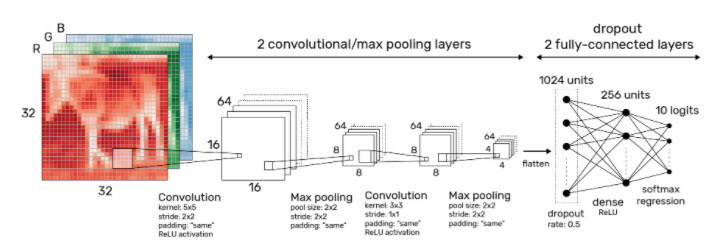

In [104]:
Image(filename="CNNgraph2.jpg")

The network has the following layers.

* Input layer with 32 by 32 RGB images from the CIFAR-10 data set
* Convolutional layer - 64 filters, 5x5 kernels, 2x2 strides, "same" padding and ReLU activation
* Maxpool layer - 2x2 pool size, 2x2 strides, "same" padding
* Convolutional layer - 64 filters, 3x3 kernels, 1x1 strides, "same" padding and ReLU activation
* Maxpool layer - 2x2 pool size, 2x2 stride, "same" padding

We then flatten the output of this last pooling layer and get 1,024 units. We apply dropout to this flat layer and connect it to a final 2-layer "dense" network.

* Fully-connected layer with 256 units and ReLU activation
* Softmax regression layer with ten output units

**The idea behind this network is to perform feature extraction with the convolutional/maxpool layers and then classification with the fully-connected ones. We add dropout to the input of the fully-connected layers to let the classifier learn different aspects of the data and avoid overfitting.**

### Load data

* Load the CIFAR-10 data
* Normalize the images and split them into train, validation and test sets
* Define a get_batches(X, y, batch_size) function to generate random X/y batches of size batch_size using a Python generator.

In [2]:
import numpy as np

# Load data
with np.load('Course 4\cifar10-60k.npz', allow_pickle=False) as npz_file:
    cifar = dict(npz_file.items())

# convert pixel into floating point
data = cifar['data'].astype(np.float32)

# Standardize data
data = (data - 128) / 255

In [5]:
cifar['data'].shape

(60000, 3072)

In [114]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(
    # Reshape images: 32 by 32 with 3 (RGB) color channels
    data.reshape(-1, 32, 32, 3),
    cifar['labels'], 
    test_size=2000, 
    random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_test, y_test, test_size=1000, random_state=0)

print('Train:',X_train.shape, y_train.shape)
print('Valid:',X_valid.shape, y_valid.shape)
print('Test:',X_test.shape, y_test.shape)

Train: (58000, 32, 32, 3) (58000,)
Valid: (1000, 32, 32, 3) (1000,)
Test: (1000, 32, 32, 3) (1000,)


In [119]:
# Batch generator
def get_batches(X, y, batch_size):
    # Shuffle X,y
    shuffled_idx = np.arange(len(y)) # 1,2,...,n
    np.random.shuffle(shuffled_idx)
    
    # Enumerate indexes by steps of batch_size
    # i: 0, b, 2b, 3b, 4b, .. where b is the batch size
    for i in range(0, len(y), batch_size):
        # Batch indexes
        batch_idx = shuffled_idx[i:i+batch_size]
        yield X[batch_idx], y[batch_idx]

### Create and Train ConvNet

* Create a convolutional neural network and train it using your batch generator
* Evaluate the accuracy on the validation set after each epoch
* Test different architectures and parameters
* Evaluate your best network on the test set
* Save the trained kernel weights of the first convolutional layer in a variable.

In [120]:
import tensorflow as tf

# Create new graph
graph = tf.Graph()

with graph.as_default():
    # Placeholders
    X = tf.placeholder(dtype=tf.float32, shape=[None, 32, 32, 3])
    y = tf.placeholder(dtype=tf.int32, shape=[None])
    print('Input:', X.shape)
    
    # Convolutional layer (64 filters, 5x5, stride: 2)
    conv1 = tf.layers.conv2d(
        X, 64, (5, 5), (2, 2), 'SAME', # "same" padding
        activation=tf.nn.relu, # ReLU
        kernel_initializer=tf.truncated_normal_initializer(stddev=0.01, seed=0),
        name='conv1'
    )
    print('Convolutional layer:', conv1.shape)
    
    # Maxpool layer (2x2, stride: 2, "same" padding)
    pool1 = tf.layers.max_pooling2d(conv1, (2, 2), (2, 2), 'SAME')
    print('Maxpool:', pool1.shape)
    
    # Convolutional layer (64 filters, 3x3, stride: 1)
    conv2 = tf.layers.conv2d(
        pool1, 64, (3, 3), (1, 1), 'SAME', # "same" padding
        activation=tf.nn.relu, # ReLU
        kernel_initializer=tf.truncated_normal_initializer(stddev=0.01, seed=0),
        name='conv2'
    )
    print('Convolutional layer:', conv2.shape)
    
    # Maxpool layer (2x2, stride: 2, "same" padding)
    pool2 = tf.layers.max_pooling2d(conv2, (2, 2), (2, 2), 'SAME')
    print('Maxpool:', pool2.shape)
    
    # Flatten output
    flat_output = tf.contrib.layers.flatten(pool2)
    print('Flatten:', flat_output.shape)
    
    # Dropout
    training = tf.placeholder(dtype=tf.bool)
    flat_output = tf.layers.dropout(flat_output, rate=0.5, seed=0, training=training)
    print('Dropout:', flat_output.shape)
    
    # Fully connected layer
    fc1 = tf.layers.dense(
        flat_output, 256, # 256 hidden units
        activation=tf.nn.relu, # ReLU
        kernel_initializer=tf.variance_scaling_initializer(scale=2, seed=0),
        bias_initializer=tf.zeros_initializer()
    )
    print('Fully-connected layer:', fc1.shape)
    
    # Output layer
    logits = tf.layers.dense(
        fc1, 10, # One output unit per category
        activation=None, # No activation function
        kernel_initializer=tf.variance_scaling_initializer(scale=1, seed=0),
        bias_initializer=tf.zeros_initializer()
    )
    print('Output layer:', logits.shape)
    
    # Kernel of the 1st conv. layer
    with tf.variable_scope('conv1', reuse=True):
        conv_kernels = tf.get_variable('kernel')
    
    # Mean cross-entropy
    mean_ce = tf.reduce_mean(
        tf.nn.sparse_softmax_cross_entropy_with_logits(
            labels=y, logits=logits))
    
    # Adam optimizer
    lr = tf.placeholder(dtype=tf.float32)
    gd = tf.train.AdamOptimizer(learning_rate=lr)

    # Minimize cross-entropy
    train_op = gd.minimize(mean_ce)
    
    # Compute predictions and accuracy
    predictions = tf.argmax(logits, axis=1, output_type=tf.int32)
    is_correct = tf.equal(y, predictions)
    accuracy = tf.reduce_mean(tf.cast(is_correct, dtype=tf.float32))

Input: (?, 32, 32, 3)
Convolutional layer: (?, 16, 16, 64)
Maxpool: (?, 8, 8, 64)
Convolutional layer: (?, 8, 8, 64)
Maxpool: (?, 4, 4, 64)
Flatten: (?, 1024)
Dropout: (?, 1024)
Fully-connected layer: (?, 256)
Output layer: (?, 10)


In [121]:
# Validation accuracy
valid_acc_values = []

with tf.Session(graph=graph) as sess:
    # Initialize variables
    sess.run(tf.global_variables_initializer())
    
    # Set seed
    np.random.seed(0)
    
    # Train several epochs
    for epoch in range(15):
        # Accuracy values (train) after each batch
        batch_acc = []
        
        for X_batch, y_batch in get_batches(X_train, y_train, 64):
            # Run training and evaluate accuracy
            _, acc_value = sess.run([train_op, accuracy], feed_dict={
                X: X_batch,
                y: y_batch,
                lr: 0.001, # Learning rate
                training: True
            })
            
            # Save accuracy (current batch)
            batch_acc.append(acc_value)

        # Evaluate validation accuracy
        valid_acc = sess.run(accuracy, feed_dict={
            X: X_valid,
            y: y_valid,
            training: False
        })
        valid_acc_values.append(valid_acc)
        
        # Print progress
        print('Epoch {} - valid: {:.3f} train: {:.3f} (mean)'.format(
            epoch+1, valid_acc, np.mean(batch_acc)
        ))
        
    # Get 1st conv. layer kernels
    kernels = conv_kernels.eval()
    
    # Evaluate test accuracy
    test_acc = sess.run(accuracy, feed_dict={
        X: X_test,
        y: y_test,
            training: False
    })
    print('Test accuracy: {:.3f}'.format(test_acc))

Epoch 1 - valid: 0.535 train: 0.435 (mean)
Epoch 2 - valid: 0.646 train: 0.553 (mean)
Epoch 3 - valid: 0.684 train: 0.606 (mean)
Epoch 4 - valid: 0.712 train: 0.645 (mean)
Epoch 5 - valid: 0.732 train: 0.665 (mean)
Epoch 6 - valid: 0.762 train: 0.683 (mean)
Epoch 7 - valid: 0.744 train: 0.694 (mean)
Epoch 8 - valid: 0.758 train: 0.703 (mean)
Epoch 9 - valid: 0.759 train: 0.716 (mean)
Epoch 10 - valid: 0.774 train: 0.725 (mean)
Epoch 11 - valid: 0.777 train: 0.730 (mean)
Epoch 12 - valid: 0.766 train: 0.735 (mean)
Epoch 13 - valid: 0.777 train: 0.742 (mean)
Epoch 14 - valid: 0.777 train: 0.748 (mean)
Epoch 15 - valid: 0.794 train: 0.752 (mean)
Test accuracy: 0.769


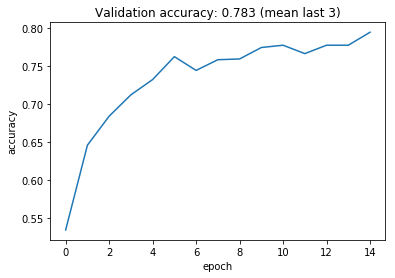

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot accuracy values
plt.plot(valid_acc_values)
plt.title('Validation accuracy: {:.3f} (mean last 3)'.format(
    np.mean(valid_acc_values[-3:]) # last three values
))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#### Visualize kernel

Plot the kernels from the first convolutional layer with the imshow() function

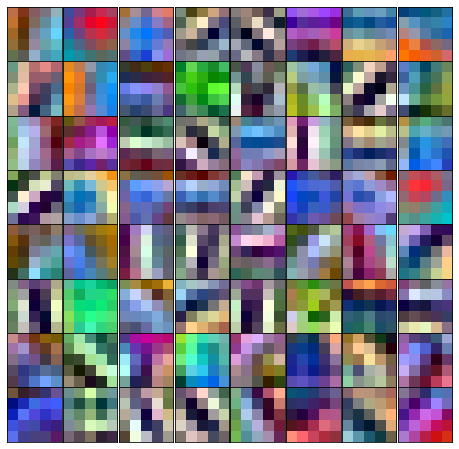

In [123]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(8, 8))

# Remove gaps between suplots
plt.subplots_adjust(wspace=0, hspace=0)

# Plot the 64 kernels from the first convolutional layer
for i, axis in enumerate(axes.flatten()):
    # Get i-th kernel (shape: 5x5x3)
    kernel = kernels[:, :, :, i].copy()
    
    # Rescale values between 0 and 1
    kernel -= kernel.min() # Rescale between 0 and max
    kernel /= kernel.max() # Rescale between 0 and 1
    
    # Plot kernel with imshow()
    axis.imshow(kernel)
    axis.get_xaxis().set_visible(False) # disable x-axis
    axis.get_yaxis().set_visible(False) # disable y-axis
    
plt.show()